In [95]:
import numpy as np

In [96]:
rect_size = 10
max_figs = 5
n = 10_000

# summetry, odds
figs = [
    np.array([[1,1,1],[1,2,1],[1,1,1]]),
    np.array([[1,1,1,1,1],[1,2,2,2,1],[1,1,1,1,1]])
]


rng = np.random.default_rng(41)

data = []


for i in range(n):
    sample_ind = rng.choice(range(len(figs)), max_figs, replace=True)
    sample_figs = [figs[ind] for ind in sample_ind]
    y = np.zeros((rect_size, rect_size))
    for fig in sample_figs:
        # insert fig into episode
        h,w = fig.shape
        x_coord = rng.choice(range(rect_size - h), 1)[0]
        y_coord = rng.choice(range(rect_size - w), 1)[0]
        y[x_coord:x_coord+h,y_coord:y_coord+w] = fig

        # # flips
        # h_flip, v_flip = rng.binomial(1, 0.5, 2)
        # if h_flip:
        #     y = np.flipud(y)
        # if v_flip:
        #     y = np.fliplr(y)
    data.append(y)
    

In [101]:
import random

from typing import List, Tuple, Optional

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.axes import Axes


TaskTuple = Tuple[
    List[np.ndarray], List[np.ndarray], List[np.ndarray], Optional[List[np.ndarray]]
]


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def plot_array(axes: Axes, data: np.ndarray, title: str) -> None:
    cmap = colors.ListedColormap(
        [
            "#000000",
            "#0074D9",
            "#FF4136",
            "#2ECC40",
            "#FFDC00",
            "#AAAAAA",
            "#F011BE",
            "#FF851B",
            "#7FDBFF",
            "#870C25",
        ]
    )
    norm = colors.Normalize(vmin=0, vmax=9)

    axes.imshow(data, cmap=cmap, norm=norm)
    axes.grid(True, which="both", color="lightgrey", linewidth=0.5)
    axes.set_yticks([x - 0.5 for x in range(1 + len(data))])
    axes.set_xticks([x - 0.5 for x in range(1 + len(data[0]))])
    axes.set_xticklabels([])
    axes.set_yticklabels([])
    axes.set_title(title)


def plot_task(task: TaskTuple, predictions: Optional[List[np.ndarray]] = None) -> None:
    x_train, y_train, x_test, y_test = task
    num_train = len(x_train)
    _, axs = plt.subplots(2, num_train, figsize=(3 * num_train, 3 * 2))
    for i in range(num_train):
        plot_array(axs[0, i], x_train[i], "train-input")
        plot_array(axs[1, i], y_train[i], "train-output")
    plt.tight_layout()
    plt.show()

    num_test = len(x_test)
    _, axs = plt.subplots(2, num_test, figsize=(3 * num_test, 3 * 2), squeeze=False)

    for i in range(num_test):
        plot_array(axs[0, i], x_test[i], "test-input")
        plot_array(axs[1, i], y_test[i], "test-output")
    plt.tight_layout()
    plt.show()

    if predictions:
        num_preds = len(predictions)
        _, axs = plt.subplots(
            2, num_preds, figsize=(3 * num_preds, 3 * 2), squeeze=False
        )

        for i in range(num_preds):
            plot_array(axs[0, i], x_test[i], "test-input")
            plot_array(axs[1, i], predictions[i], "test-prediction")
            plt.tight_layout()
            plt.show()


def plot_xy(x,y) -> None:
    _, axs = plt.subplots(2, 1, figsize=(3 * 1, 3 * 2))
    plot_array(axs[0], x, "input")
    plot_array(axs[1], y, "output")
    plt.tight_layout()
    plt.show()


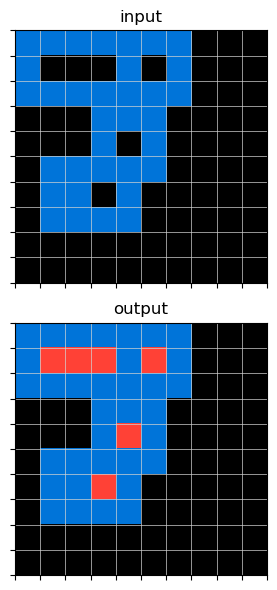

In [102]:
y = data[220]
x = y.copy()
mask = x == 2
x[mask] = 0
plot_xy(x, y)